In [1]:
import pandas as pd

In [2]:
EXCEL_PATH = "/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Daten/crypto_7years_daily.xlsx"

In [3]:
import pandas as pd
from backtester import Backtester
from strategies.simple_moving_average_long import TrendFollowingStrategy
from strategies.mean_reversion import MeanReversionStrategy

strategy_class = TrendFollowingStrategy
param_grid = {
    "window": range(10,301,10),
}
initial_cash = 10000

# Load all sheet names (one per asset)
xls = pd.read_excel(EXCEL_PATH,sheet_name="Cleaned data", parse_dates=["DATES"])
xls.drop_duplicates(inplace=True)
xls.set_index("DATES", inplace=True)

from itertools import product

def get_param_combinations(grid):
    keys = list(grid.keys())
    values = list(grid.values())
    for combo in product(*values):
        yield dict(zip(keys, combo))

results = []


In [4]:
#get columns names in the dataframe
assets = xls.columns.tolist()

In [ ]:
#calculate silence for each asset
# and run backtesting for each combination of parameters
for asset in assets:
    df = xls[[asset]]
    for params in get_param_combinations(param_grid):
        strategy = strategy_class(df.columns[0],long_only=False,**params)

        bt = Backtester(
            data=df.copy(),  # changed from file path to raw data
            strategy=strategy,
            initial_cash=initial_cash
        )
        bt.run()
        bt.evaluate(silent=True)

        result = {
            "asset": asset,
            **params,
            **bt.get_performance_metrics()  # e.g., return, sharpe
        }

        results.append(result)


results_df = pd.DataFrame(results)
results_df.sort_values(by="sharpe", ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
results_df.head(50)


In [ ]:
xls.columns

Index(['Enjin Coin', 'Maker', 'Solana', 'Cardano', 'Monero', 'Litecoin',
       'Dogecoin', 'Chainlink', 'Bitcoin', 'XRP', 'Bitcoin Cash', 'Polygon',
       'Ethereum', 'Uniswap', 'VeChain', 'Curve DAO Token', 'Avalanche',
       'Algorand', 'Stellar', 'IOTA', 'Cronos', 'Fantom', 'Flow', 'Tezos',
       'Ethereum Classic', 'Dash', 'Internet Computer', 'Elrond', 'Polkadot',
       'Binance Coin', 'Terra Classic', 'Stacks', 'Wrapped Bitcoin',
       'Axie Infinity', 'TRON', 'Zcash', 'EOS', 'Hedera Hashgraph', 'Sand',
       'Filecoin', 'Tether', 'Dai', 'USD Coin', 'Basic Attention Token',
       'Cosmos', 'Cosmos.1', 'TerraUSD', 'Decentraland', 'Shiba Inu', 'Aave'],
      dtype='object')

In [ ]:
results_df[results_df["asset"] == 'Aave'].sort_values(by="sharpe", ascending=False)

,asset,window,total_net_return,annualized_return,sharpe,max_drawdown,avg_trade_return,median_trade_return,avg_trade_return_long,median_trade_return_long,avg_trade_return_short,median_trade_return_short,skewness,num_trades,total_fees_paid,fees_as_pct_of_gross
520,Aave,50,0.5791,0.0841,0.15,-0.6254,0.08839,0.01998,0.08839,0.01998,N/A,NaN,0.724,41,0.0328,6.70
676,Aave,10,0.2189,0.0356,0.06,-0.6159,0.07446,0.02388,0.07446,0.02388,N/A,NaN,-0.482,112,0.0896,31.16
843,Aave,60,-0.0762,-0.0139,-0.03,-0.7722,0.08443,0.00733,0.08443,0.00733,N/A,NaN,0.540,38,0.0304,-62.18
875,Aave,40,-0.1451,-0.0273,-0.05,-0.5860,0.07867,0.00141,0.07867,0.00141,N/A,NaN,0.554,48,0.0384,-32.45
968,Aave,250,-0.2730,-0.0548,-0.12,-0.5997,0.06701,-0.00040,0.06701,-0.00040,N/A,NaN,0.503,23,0.0184,-6.13
1002,Aave,260,-0.2967,-0.0603,-0.13,-0.6187,0.06965,-0.00040,0.06965,-0.00040,N/A,NaN,0.501,21,0.0168,-5.01
1006,Aave,140,-0.3326,-0.0690,-0.14,-0.7337,0.07878,-0.00040,0.07878,-0.00040,N/A,NaN,0.494,30,0.0240,-6.31
1019,Aave,180,-0.3398,-0.0708,-0.15,-0.7049,0.06217,-0.00040,0.06217,-0.00040,N/A,NaN,0.657,31,0.0248,-6.35
1020,Aave,190,-0.3447,-0.0720,-0.15,-0.6270,0.06630,-0.00040,0.06630,-0.00040,N/A,NaN,0.355,26,0.0208,-5.18
1027,Aave,210,-0.3315,-0.0687,-0.15,-0.6022,0.05527,-0.00040,0.05527,-0.00040,N/A,NaN,0.480,27,0.0216,-5.67


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


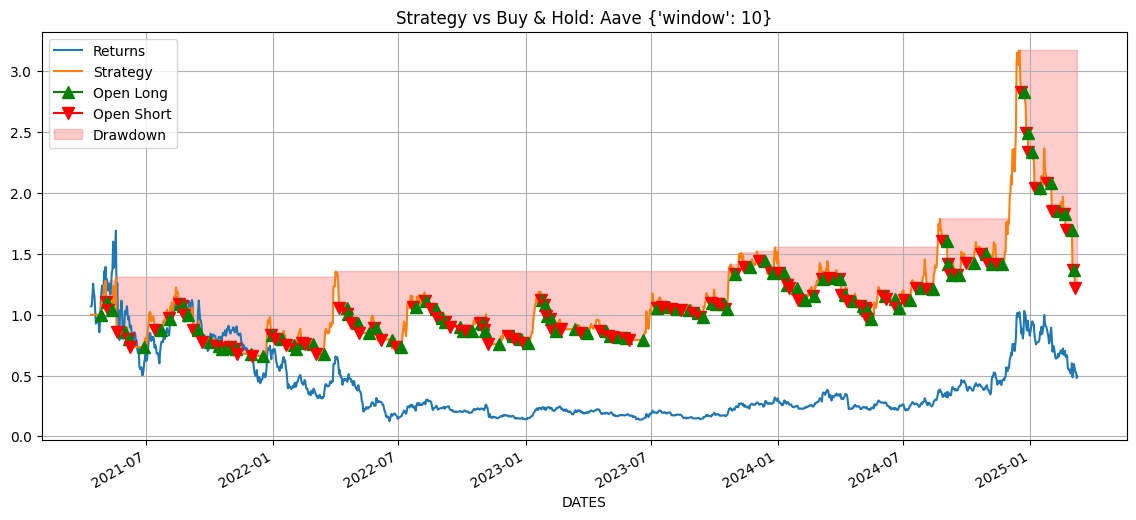

       start        end direction  log_return  net_return_pct  length  \
0 2021-04-26 2021-05-03      Long    0.245071       27.771163       8   
1 2021-05-05 2021-05-05      Long   -0.000400       -0.039992       1   
2 2021-05-12 2021-05-18      Long    0.230765       25.956293       7   
3 2021-05-31 2021-06-04      Long   -0.026037       -2.570058       5   
4 2021-06-06 2021-06-06      Long   -0.000400       -0.039992       1   
5 2021-06-28 2021-07-12      Long    0.269737       30.961961      15   
6 2021-07-22 2021-08-02      Long    0.139734       14.996798      12   
7 2021-08-04 2021-08-16      Long    0.200456       22.196016      13   
8 2021-08-19 2021-08-20      Long    0.009773        0.982127       2   
9 2021-08-23 2021-08-23      Long   -0.000400       -0.039992       1   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


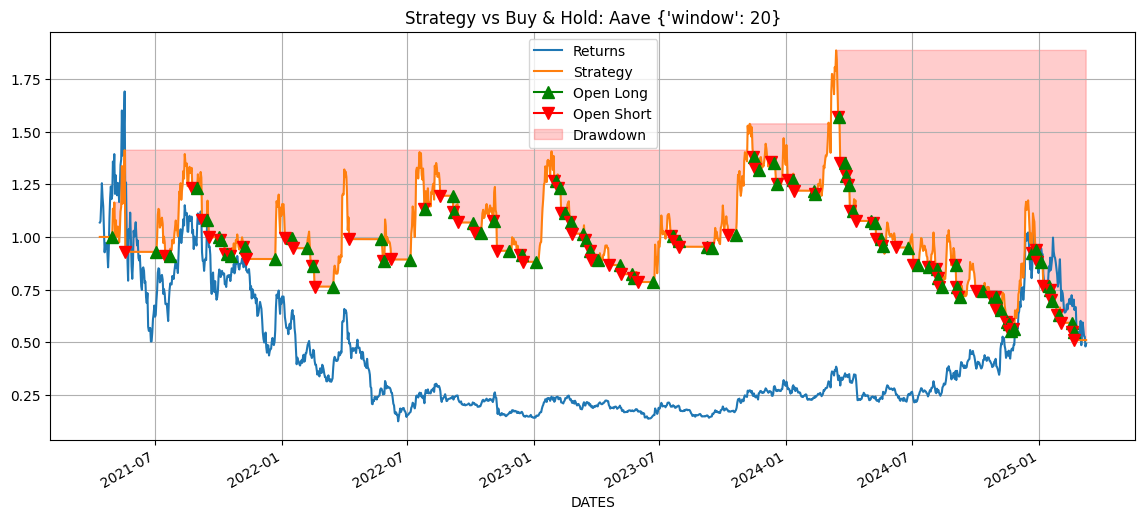

       start        end direction  log_return  net_return_pct  length  \
0 2021-04-30 2021-05-18      Long    0.345307       41.242315      19   
1 2021-07-03 2021-07-15      Long    0.046218        4.730300      13   
2 2021-07-22 2021-08-23      Long    0.380793       46.344513      33   
3 2021-08-31 2021-09-06      Long    0.040687        4.152643       7   
4 2021-09-14 2021-09-16      Long    0.002934        0.293846       3   
5 2021-10-02 2021-10-02      Long   -0.000400       -0.039992       1   
6 2021-10-05 2021-10-09      Long   -0.002549       -0.254592       5   
7 2021-10-13 2021-10-17      Long    0.022542        2.279847       5   
8 2021-10-19 2021-11-05      Long    0.073669        7.645081      18   
9 2021-11-08 2021-11-09      Long    0.011038        1.109883       2   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


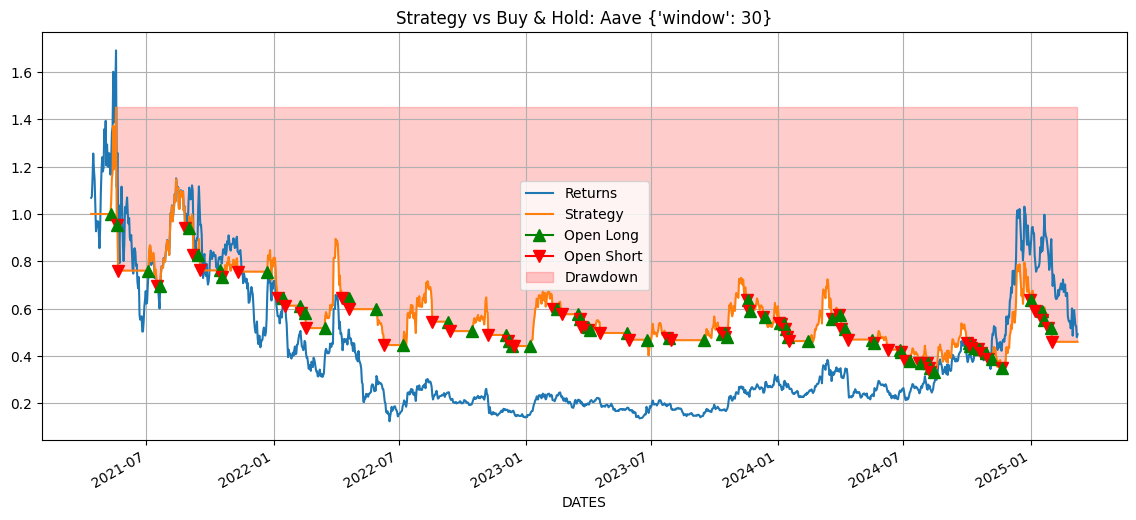

       start        end direction  log_return  net_return_pct  length  \
0 2021-05-10 2021-05-18      Long    0.371538       44.996223       9   
1 2021-05-20 2021-05-20      Long   -0.000400       -0.039992       1   
2 2021-07-04 2021-07-15      Long   -0.020484       -2.027579      12   
3 2021-07-21 2021-08-25      Long    0.393685       48.243418      36   
4 2021-08-31 2021-09-06      Long    0.040687        4.152643       7   
5 2021-09-14 2021-09-16      Long    0.002934        0.293846       3   
6 2021-10-16 2021-10-17      Long   -0.000618       -0.061794       2   
7 2021-10-19 2021-11-09      Long    0.100993       10.626853      22   
8 2021-12-23 2022-01-06      Long   -0.110649      -10.474683      15   
9 2022-01-15 2022-01-16      Long    0.015911        1.603819       2   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


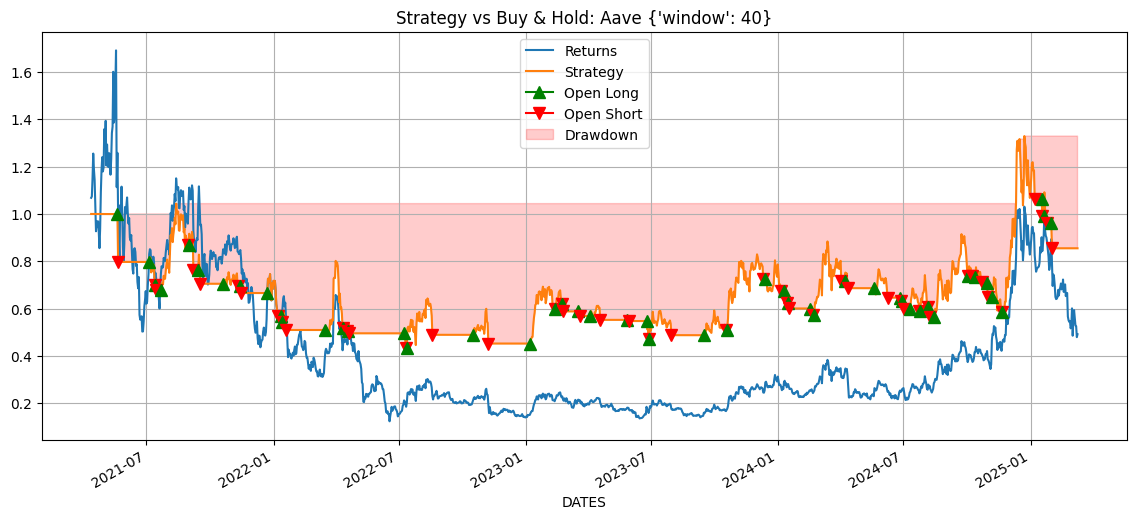

       start        end direction  log_return  net_return_pct  length  \
0 2021-05-20 2021-05-20      Long   -0.000400       -0.039992       1   
1 2021-07-05 2021-07-12      Long   -0.039188       -3.842975       8   
2 2021-07-14 2021-07-14      Long   -0.000400       -0.039992       1   
3 2021-07-22 2021-08-29      Long    0.266854       30.584962      39   
4 2021-08-31 2021-09-06      Long    0.040687        4.152643       7   
5 2021-09-14 2021-09-16      Long    0.002934        0.293846       3   
6 2021-10-20 2021-11-09      Long    0.060201        6.205017      21   
7 2021-11-14 2021-11-14      Long   -0.000400       -0.039992       1   
8 2021-12-23 2022-01-06      Long   -0.110649      -10.474683      15   
9 2022-01-12 2022-01-12      Long   -0.000400       -0.039992       1   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


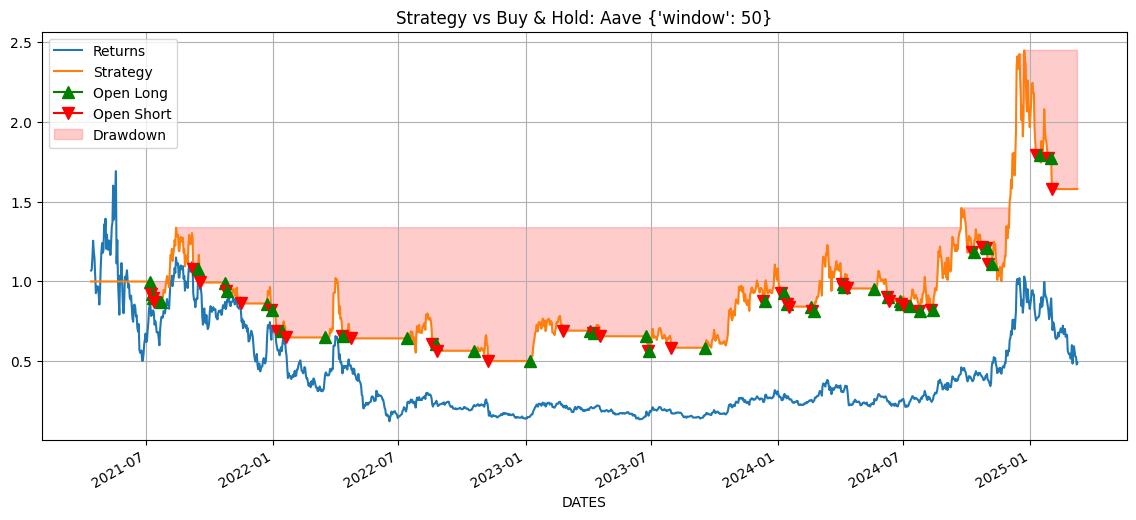

       start        end direction  log_return  net_return_pct  length  \
0 2021-07-06 2021-07-07      Long   -0.005245       -0.523123       2   
1 2021-07-09 2021-07-09      Long   -0.000400       -0.039992       1   
2 2021-07-11 2021-07-11      Long   -0.000400       -0.039992       1   
3 2021-07-22 2021-09-06      Long    0.382870       46.648674      47   
4 2021-09-14 2021-09-16      Long    0.002934        0.293846       3   
5 2021-10-23 2021-10-23      Long   -0.000400       -0.039992       1   
6 2021-10-26 2021-11-14      Long   -0.044020       -4.306487      20   
7 2021-12-23 2021-12-28      Long    0.021599        2.183384       6   
8 2021-12-30 2022-01-05      Long   -0.133386      -12.487264       7   
9 2022-01-14 2022-01-18      Long    0.037320        3.802527       5   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


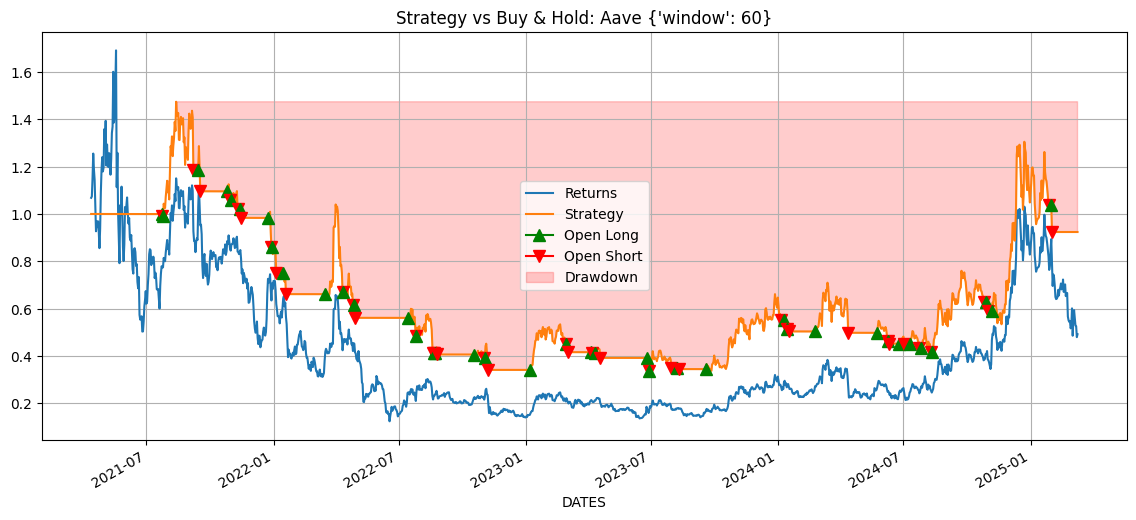

       start        end direction  log_return  net_return_pct  length  \
0 2021-07-23 2021-07-23      Long   -0.000400       -0.039992       1   
1 2021-07-25 2021-09-06      Long    0.349492       41.834754      44   
2 2021-09-14 2021-09-16      Long    0.002934        0.293846       3   
3 2021-10-26 2021-10-29      Long   -0.005192       -0.517872       4   
4 2021-11-01 2021-11-09      Long    0.035751        3.639727       9   
5 2021-11-13 2021-11-14      Long    0.008485        0.852082       2   
6 2021-12-24 2021-12-28      Long   -0.065995       -6.386485       5   
7 2021-12-30 2022-01-04      Long   -0.040970       -4.014252       6   
8 2022-01-15 2022-01-18      Long   -0.026907       -2.654868       4   
9 2022-03-17 2022-04-10      Long    0.126372       13.470364      25   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


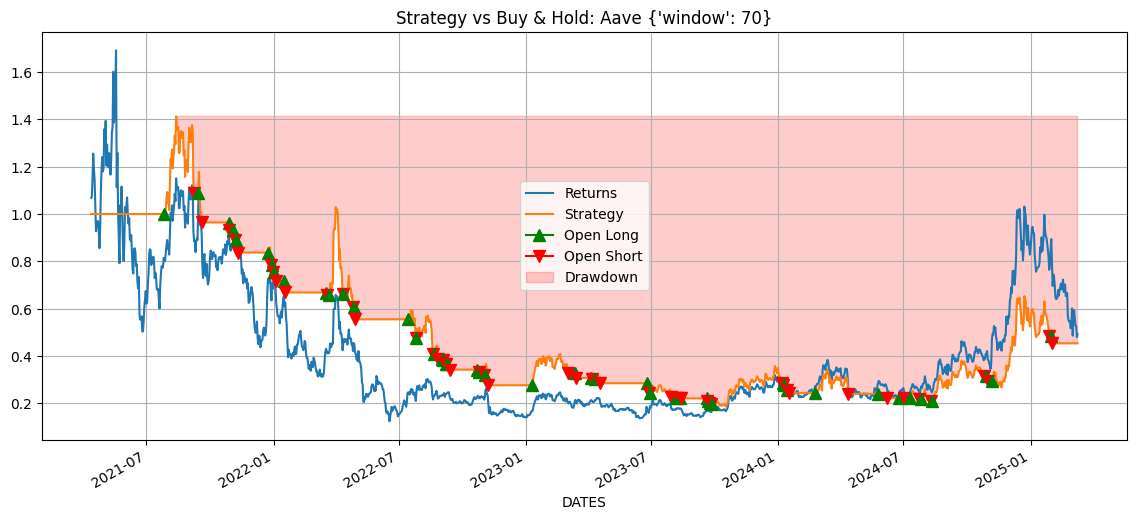

       start        end direction  log_return  net_return_pct  length  \
0 2021-07-26 2021-09-07      Long    0.129365       13.810532      44   
1 2021-09-14 2021-09-18      Long   -0.076267       -7.343133       5   
2 2021-10-28 2021-10-28      Long   -0.000400       -0.039992       1   
3 2021-11-04 2021-11-05      Long   -0.020418       -2.021100       2   
4 2021-11-08 2021-11-09      Long    0.011038        1.109883       2   
5 2021-12-24 2021-12-27      Long    0.025896        2.623407       4   
6 2021-12-30 2021-12-30      Long   -0.000400       -0.039992       1   
7 2022-01-01 2022-01-03      Long   -0.000747       -0.074624       3   
8 2022-01-16 2022-01-16      Long   -0.000400       -0.039992       1   
9 2022-03-18 2022-03-18      Long   -0.000400       -0.039992       1   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


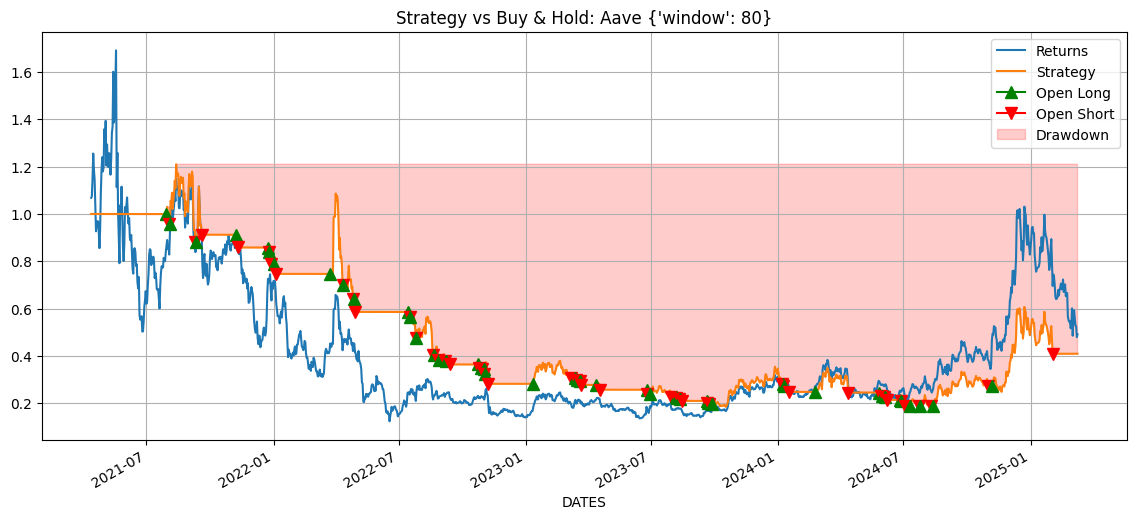

       start        end direction  log_return  net_return_pct  length  \
0 2021-07-30 2021-08-02      Long   -0.002848       -0.284350       4   
1 2021-08-04 2021-09-09      Long   -0.027354       -2.698283      37   
2 2021-09-11 2021-09-18      Long    0.077863        8.097450       8   
3 2021-11-08 2021-11-09      Long    0.011038        1.109883       2   
4 2021-12-24 2021-12-24      Long   -0.000400       -0.039992       1   
5 2021-12-26 2021-12-27      Long    0.032484        3.301760       2   
6 2022-01-01 2022-01-03      Long   -0.000747       -0.074624       3   
7 2022-03-24 2022-04-10      Long    0.047988        4.915859      18   
8 2022-04-12 2022-04-25      Long   -0.009539       -0.949413      14   
9 2022-04-27 2022-04-28      Long   -0.006145       -0.612629       2   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


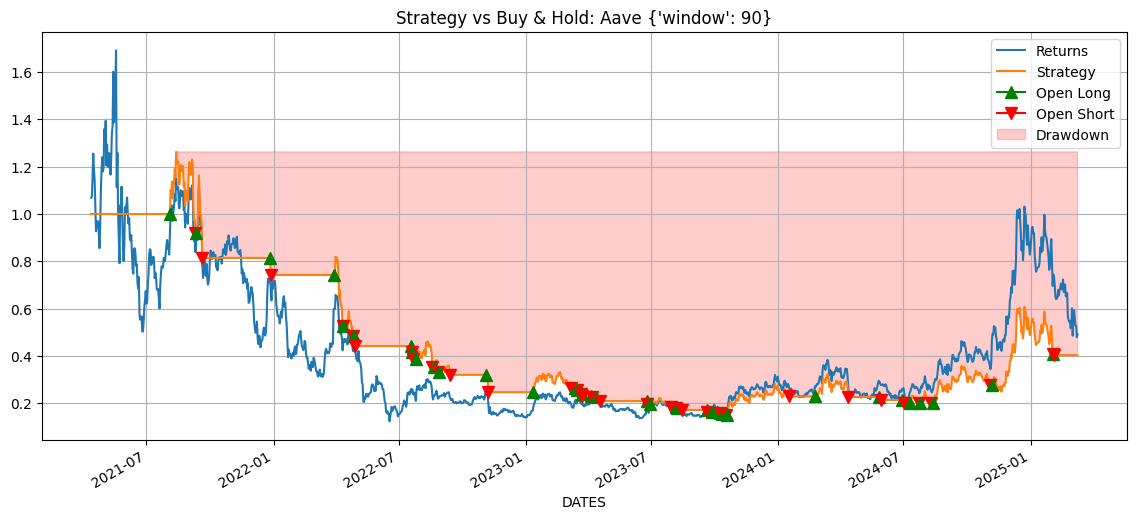

       start        end direction  log_return  net_return_pct  length  \
0 2021-08-04 2021-09-09      Long   -0.027354       -2.698283      37   
1 2021-09-11 2021-09-19      Long    0.034751        3.536201       9   
2 2021-12-27 2021-12-27      Long   -0.000400       -0.039992       1   
3 2022-03-29 2022-04-10      Long   -0.228286      -20.410355      13   
4 2022-04-12 2022-04-25      Long   -0.009539       -0.949413      14   
5 2022-04-27 2022-04-28      Long   -0.006145       -0.612629       2   
6 2022-07-19 2022-07-19      Long   -0.000400       -0.039992       1   
7 2022-07-21 2022-07-21      Long   -0.000400       -0.039992       1   
8 2022-07-27 2022-08-18      Long    0.055558        5.712988      23   
9 2022-08-21 2022-08-26      Long    0.013827        1.392350       6   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


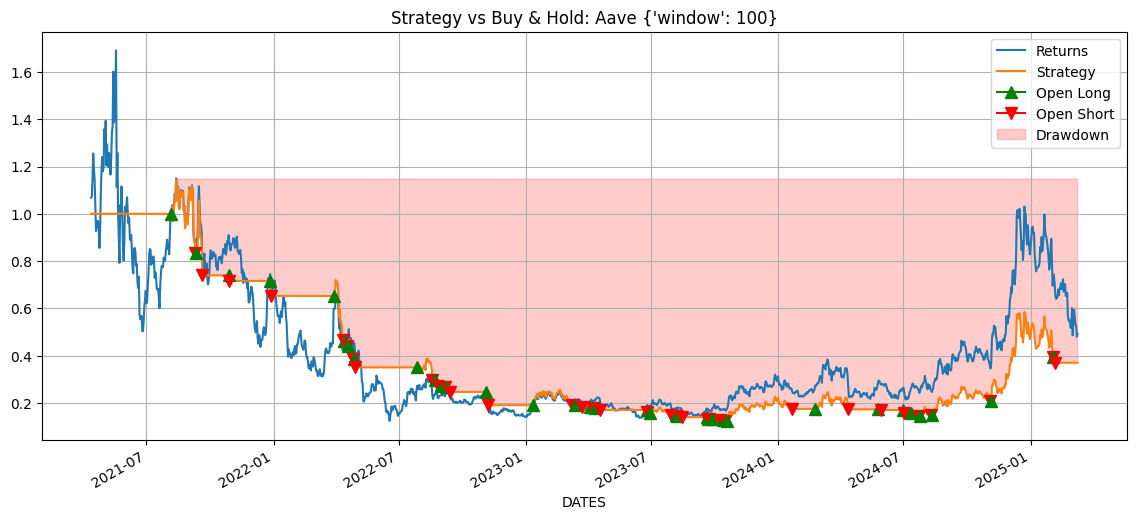

       start        end direction  log_return  net_return_pct  length  \
0 2021-08-05 2021-09-09      Long   -0.124063      -11.667540      36   
1 2021-09-11 2021-09-19      Long    0.034751        3.536201       9   
2 2021-10-28 2021-10-28      Long   -0.000400       -0.039992       1   
3 2021-12-27 2021-12-27      Long   -0.000400       -0.039992       1   
4 2022-03-29 2022-04-10      Long   -0.228286      -20.410355      13   
5 2022-04-13 2022-04-17      Long   -0.002516       -0.251256       5   
6 2022-04-19 2022-04-25      Long   -0.062633       -6.071198       7   
7 2022-04-27 2022-04-28      Long   -0.006145       -0.612629       2   
8 2022-07-28 2022-08-18      Long   -0.018005       -1.784356      22   
9 2022-08-23 2022-08-26      Long   -0.012969       -1.288532       4   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


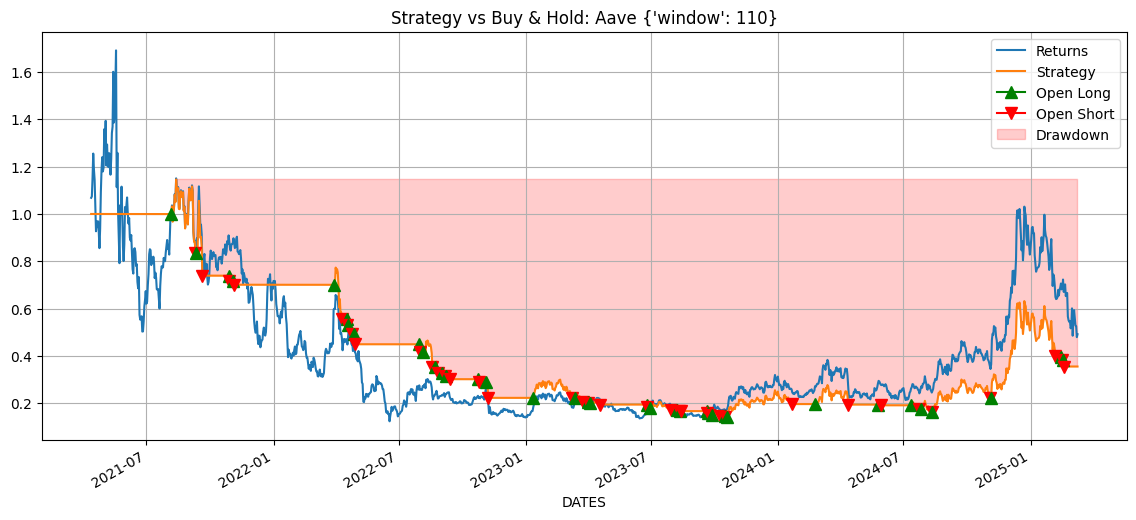

       start        end direction  log_return  net_return_pct  length  \
0 2021-08-05 2021-09-09      Long   -0.124063      -11.667540      36   
1 2021-09-11 2021-09-19      Long    0.034751        3.536201       9   
2 2021-10-28 2021-10-28      Long   -0.000400       -0.039992       1   
3 2021-11-04 2021-11-04      Long   -0.000400       -0.039992       1   
4 2022-03-29 2022-04-09      Long   -0.182397      -16.672966      12   
5 2022-04-17 2022-04-17      Long   -0.000400       -0.039992       1   
6 2022-04-19 2022-04-23      Long   -0.019563       -1.937263       5   
7 2022-04-27 2022-04-28      Long   -0.006145       -0.612629       2   
8 2022-07-31 2022-07-31      Long   -0.000400       -0.039992       1   
9 2022-08-05 2022-08-18      Long   -0.015532       -1.541222      14   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


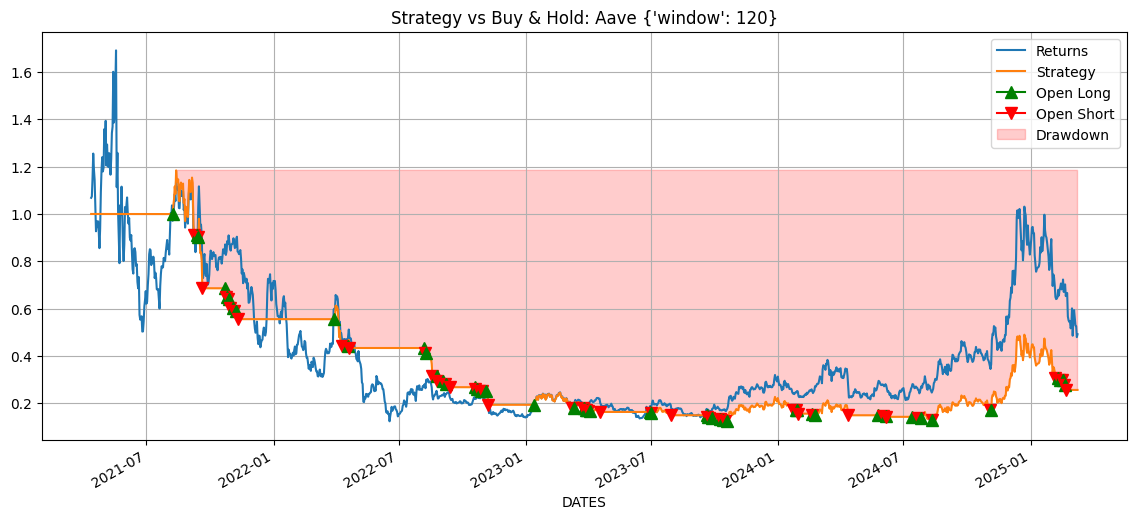

       start        end direction  log_return  net_return_pct  length  \
0 2021-08-08 2021-09-07      Long   -0.046747       -4.567120      31   
1 2021-09-12 2021-09-12      Long   -0.000400       -0.039992       1   
2 2021-09-14 2021-09-19      Long   -0.119379      -11.252855       6   
3 2021-10-23 2021-10-23      Long   -0.000400       -0.039992       1   
4 2021-10-26 2021-10-26      Long   -0.000400       -0.039992       1   
5 2021-10-28 2021-10-29      Long   -0.032132       -3.162081       2   
6 2021-11-04 2021-11-04      Long   -0.000400       -0.039992       1   
7 2021-11-08 2021-11-09      Long    0.011038        1.109883       2   
8 2022-03-29 2022-04-09      Long   -0.182397      -16.672966      12   
9 2022-04-19 2022-04-20      Long    0.056978        5.863246       2   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


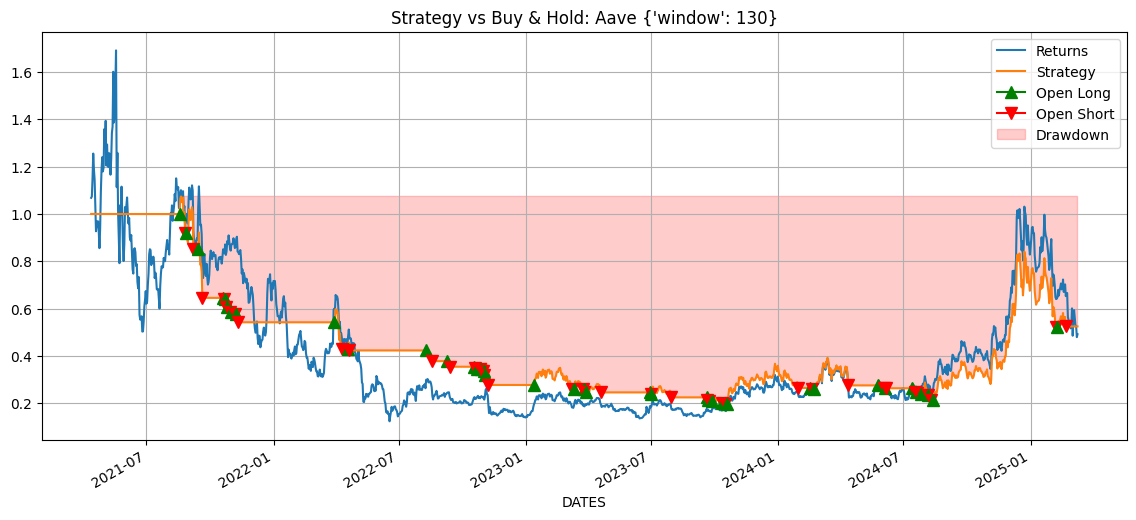

       start        end direction  log_return  net_return_pct  length  \
0 2021-08-18 2021-08-25      Long    0.008251        0.828532       8   
1 2021-08-27 2021-09-06      Long    0.092333        9.673036      11   
2 2021-09-14 2021-09-19      Long   -0.119379      -11.252855       6   
3 2021-10-20 2021-10-20      Long   -0.000400       -0.039992       1   
4 2021-10-23 2021-10-23      Long   -0.000400       -0.039992       1   
5 2021-10-26 2021-10-29      Long   -0.005192       -0.517872       4   
6 2021-11-01 2021-11-05      Long    0.008427        0.846281       5   
7 2021-11-08 2021-11-09      Long    0.011038        1.109883       2   
8 2022-03-29 2022-04-09      Long   -0.182397      -16.672966      12   
9 2022-04-19 2022-04-20      Long    0.056978        5.863246       2   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


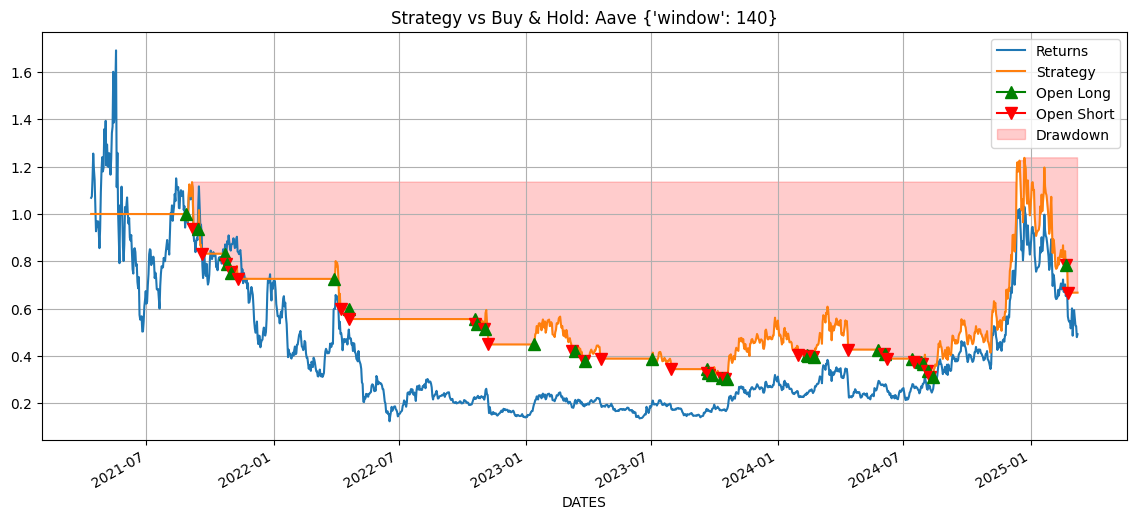

       start        end direction  log_return  net_return_pct  length  \
0 2021-08-28 2021-09-06      Long    0.106200       11.204376      10   
1 2021-09-14 2021-09-18      Long   -0.076267       -7.343133       5   
2 2021-10-23 2021-10-23      Long   -0.000400       -0.039992       1   
3 2021-10-26 2021-10-30      Long   -0.034731       -3.413475       5   
4 2021-11-01 2021-11-09      Long    0.035751        3.639727       9   
5 2022-03-29 2022-04-07      Long   -0.090762       -8.676523      10   
6 2022-04-20 2022-04-20      Long   -0.000400       -0.039992       1   
7 2022-10-19 2022-10-19      Long   -0.000400       -0.039992       1   
8 2022-10-22 2022-11-01      Long    0.017128        1.727598      11   
9 2022-11-03 2022-11-07      Long    0.036520        3.719499       5   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


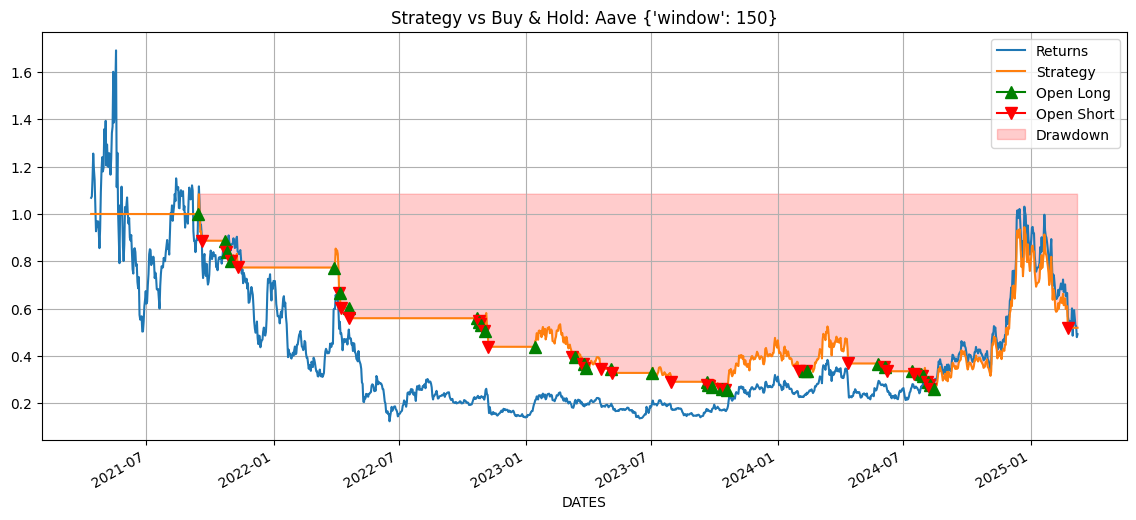

       start        end direction  log_return  net_return_pct  length  \
0 2021-09-14 2021-09-18      Long   -0.076267       -7.343133       5   
1 2021-10-23 2021-10-23      Long   -0.000400       -0.039992       1   
2 2021-10-26 2021-10-30      Long   -0.034731       -3.413475       5   
3 2021-11-01 2021-11-09      Long    0.035751        3.639727       9   
4 2022-03-29 2022-04-05      Long   -0.003550       -0.354399       8   
5 2022-04-07 2022-04-07      Long   -0.000400       -0.039992       1   
6 2022-04-20 2022-04-20      Long   -0.000400       -0.039992       1   
7 2022-10-23 2022-10-24      Long    0.016904        1.704816       2   
8 2022-10-26 2022-10-26      Long   -0.000400       -0.039992       1   
9 2022-10-28 2022-11-01      Long    0.000807        0.080762       5   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


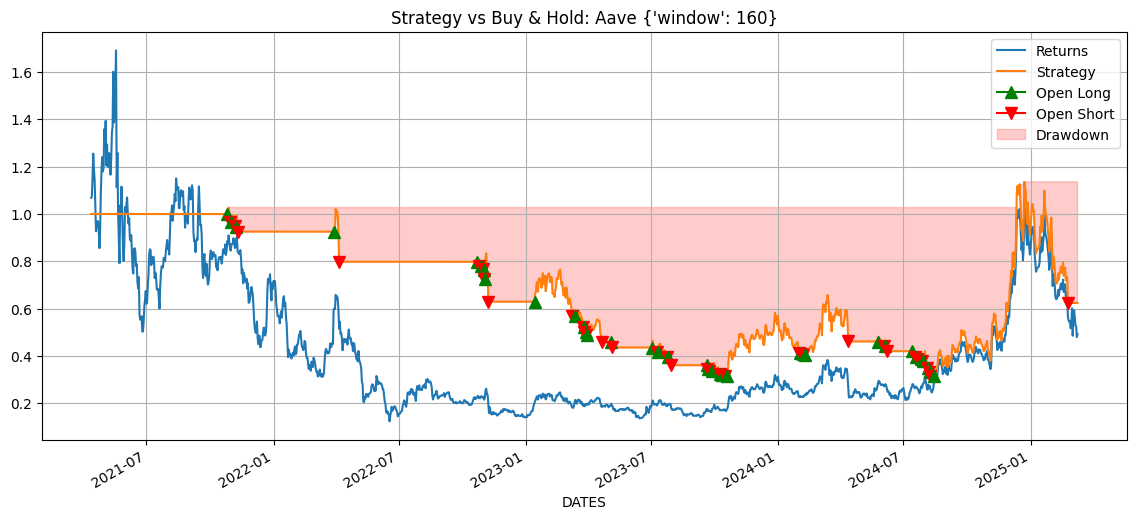

       start        end direction  log_return  net_return_pct  length  \
0 2021-10-26 2021-10-29      Long   -0.005192       -0.517872       4   
1 2021-11-01 2021-11-05      Long    0.008427        0.846281       5   
2 2021-11-07 2021-11-09      Long    0.048931        5.014810       3   
3 2022-03-29 2022-04-05      Long   -0.003550       -0.354399       8   
4 2022-10-23 2022-10-24      Long    0.016904        1.704816       2   
5 2022-10-28 2022-10-30      Long   -0.002540       -0.253679       3   
6 2022-11-01 2022-11-01      Long   -0.000400       -0.039992       1   
7 2022-11-03 2022-11-07      Long    0.036520        3.719499       5   
8 2023-01-14 2023-03-08      Long   -0.031891       -3.138805      54   
9 2023-03-13 2023-03-24      Long   -0.047912       -4.678199      12   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


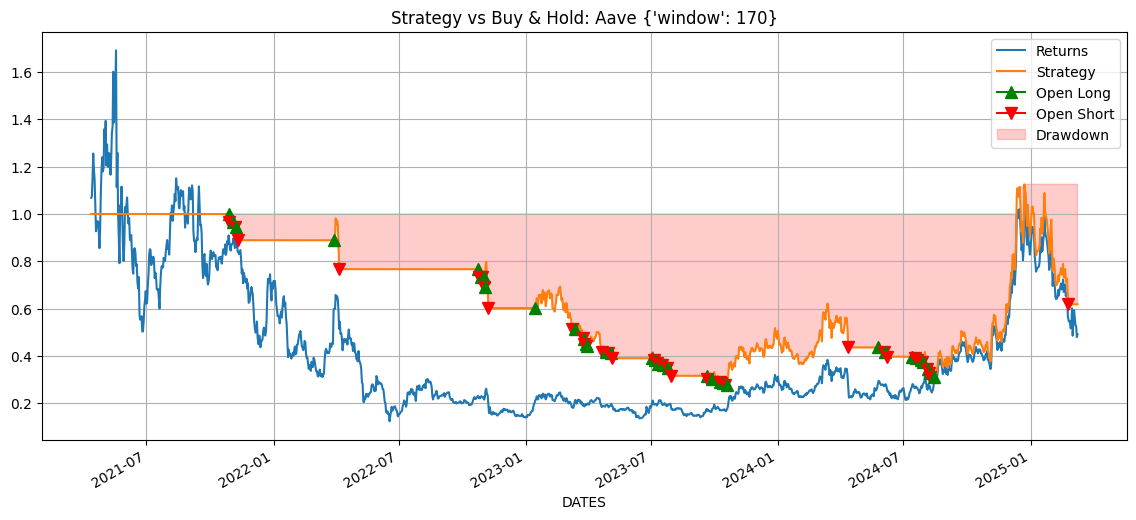

       start        end direction  log_return  net_return_pct  length  \
0 2021-10-28 2021-10-28      Long   -0.000400       -0.039992       1   
1 2021-11-03 2021-11-05      Long    0.003623        0.362962       3   
2 2021-11-08 2021-11-09      Long    0.011038        1.109883       2   
3 2022-03-29 2022-04-05      Long   -0.003550       -0.354399       8   
4 2022-10-24 2022-10-24      Long   -0.000400       -0.039992       1   
5 2022-10-28 2022-10-29      Long    0.012830        1.291261       2   
6 2022-11-01 2022-11-01      Long   -0.000400       -0.039992       1   
7 2022-11-03 2022-11-07      Long    0.036520        3.719499       5   
8 2023-01-15 2023-03-08      Long   -0.088155       -8.438091      53   
9 2023-03-13 2023-03-24      Long   -0.047912       -4.678199      12   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


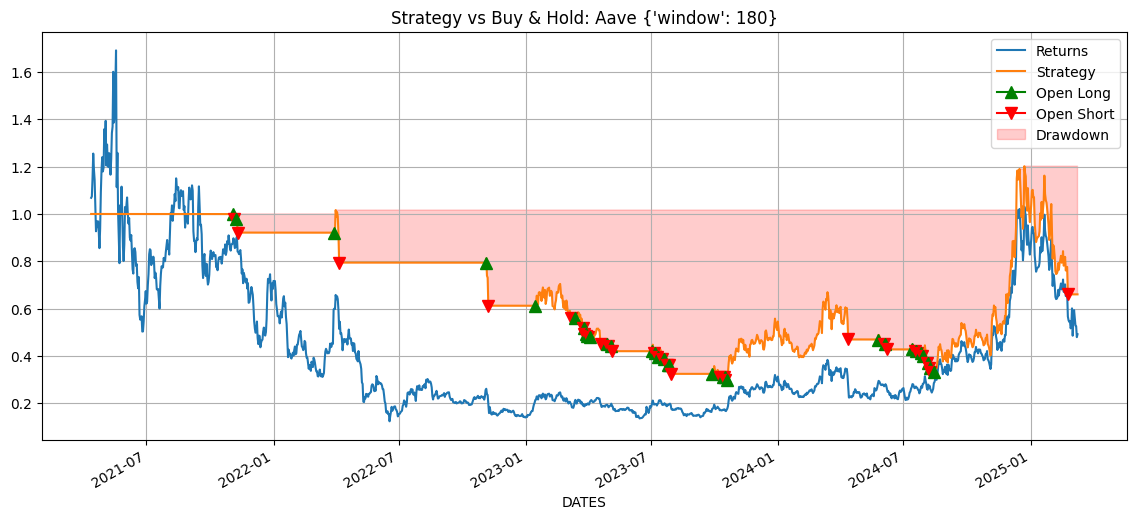

       start        end direction  log_return  net_return_pct  length  \
0 2021-11-04 2021-11-04      Long   -0.000400       -0.039992       1   
1 2021-11-08 2021-11-09      Long    0.011038        1.109883       2   
2 2022-03-29 2022-04-05      Long   -0.003550       -0.354399       8   
3 2022-11-04 2022-11-07      Long   -0.084010       -8.057790       4   
4 2023-01-15 2023-03-07      Long   -0.068763       -6.645197      52   
5 2023-03-13 2023-03-24      Long   -0.047912       -4.678199      12   
6 2023-03-26 2023-03-26      Long   -0.000400       -0.039992       1   
7 2023-03-29 2023-03-29      Long   -0.000400       -0.039992       1   
8 2023-03-31 2023-04-01      Long    0.014135        1.423581       2   
9 2023-04-04 2023-04-19      Long   -0.028489       -2.808704      16   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


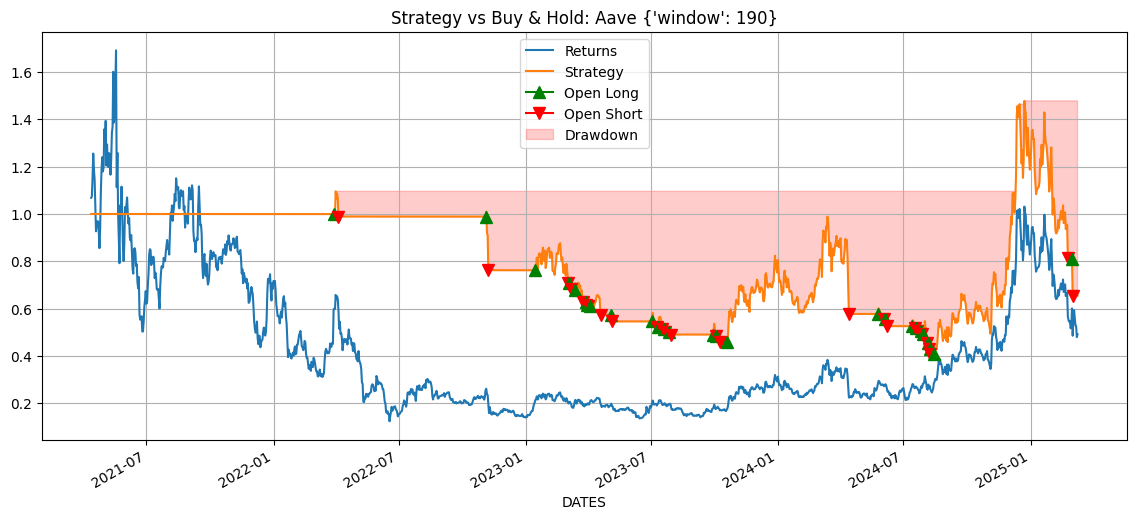

       start        end direction  log_return  net_return_pct  length  \
0 2022-03-30 2022-04-04      Long    0.064291        6.640300       6   
1 2022-11-04 2022-11-07      Long   -0.084010       -8.057790       4   
2 2023-01-15 2023-03-03      Long   -0.043053       -4.213898      48   
3 2023-03-05 2023-03-07      Long   -0.020583       -2.037213       3   
4 2023-03-13 2023-03-24      Long   -0.047912       -4.678199      12   
5 2023-03-29 2023-03-29      Long   -0.000400       -0.039992       1   
6 2023-03-31 2023-04-01      Long    0.014135        1.423581       2   
7 2023-04-04 2023-04-19      Long   -0.028489       -2.808704      16   
8 2023-05-05 2023-05-05      Long   -0.000400       -0.039992       1   
9 2023-07-03 2023-07-09      Long   -0.014044       -1.394581       7   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


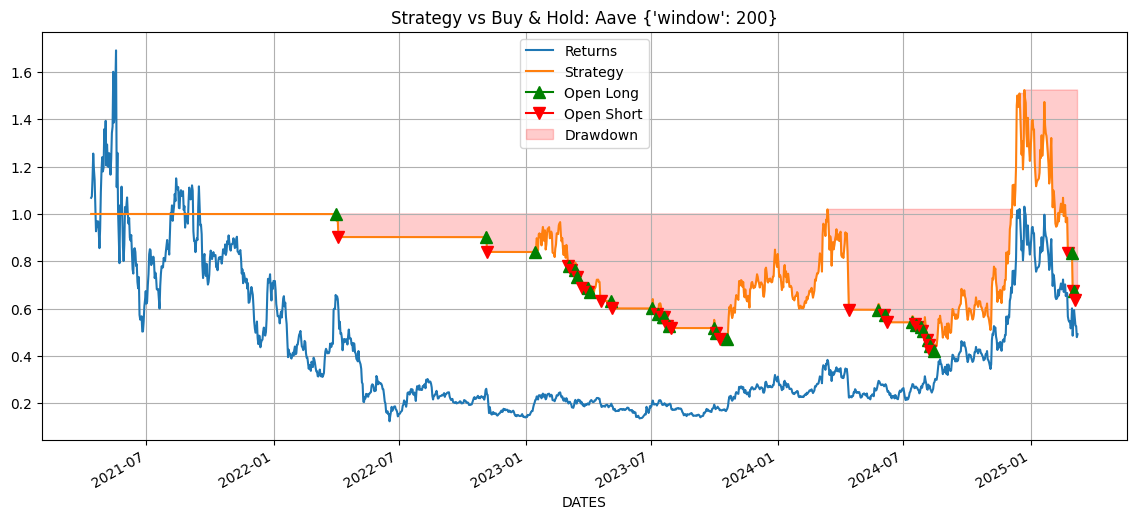

       start        end direction  log_return  net_return_pct  length  \
0 2022-04-01 2022-04-04      Long   -0.027379       -2.700802       4   
1 2022-11-04 2022-11-05      Long    0.020714        2.092958       2   
2 2023-01-15 2023-03-03      Long   -0.043053       -4.213898      48   
3 2023-03-05 2023-03-06      Long    0.012451        1.252879       2   
4 2023-03-13 2023-03-15      Long   -0.031879       -3.137605       3   
5 2023-03-17 2023-03-23      Long   -0.024088       -2.380026       7   
6 2023-04-01 2023-04-01      Long   -0.000400       -0.039992       1   
7 2023-04-04 2023-04-19      Long   -0.028489       -2.808704      16   
8 2023-05-05 2023-05-05      Long   -0.000400       -0.039992       1   
9 2023-07-03 2023-07-09      Long   -0.014044       -1.394581       7   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


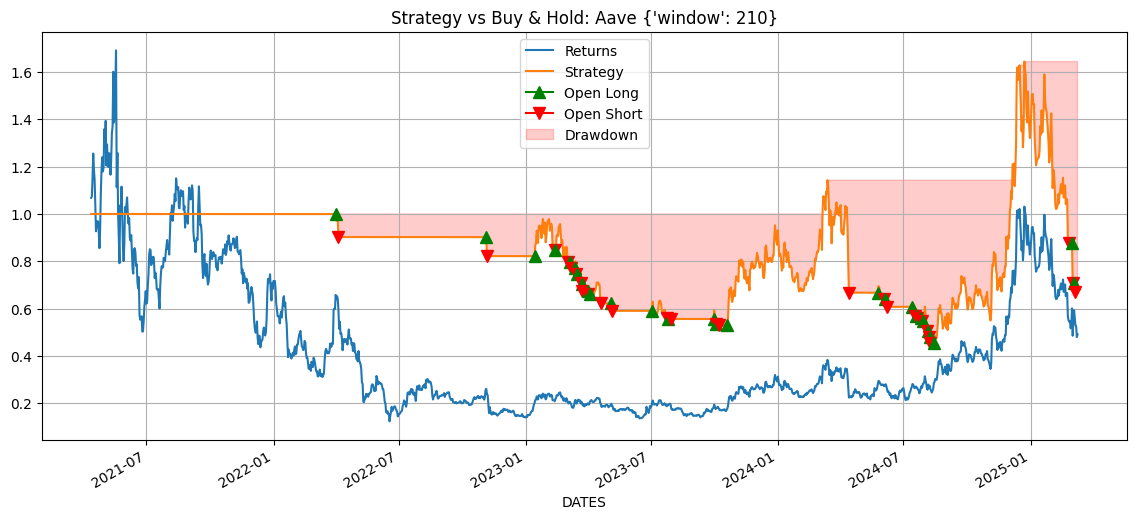

       start        end direction  log_return  net_return_pct  length  \
0 2022-04-01 2022-04-04      Long   -0.027379       -2.700802       4   
1 2022-11-05 2022-11-05      Long   -0.000400       -0.039992       1   
2 2023-01-14 2023-02-11      Long    0.048346        4.953354      29   
3 2023-02-13 2023-03-02      Long   -0.015129       -1.501526      18   
4 2023-03-06 2023-03-06      Long   -0.000400       -0.039992       1   
5 2023-03-13 2023-03-14      Long    0.038103        3.883842       2   
6 2023-03-17 2023-03-21      Long    0.006373        0.639373       5   
7 2023-03-23 2023-03-23      Long   -0.000400       -0.039992       1   
8 2023-04-01 2023-04-01      Long   -0.000400       -0.039992       1   
9 2023-04-04 2023-04-19      Long   -0.028489       -2.808704      16   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


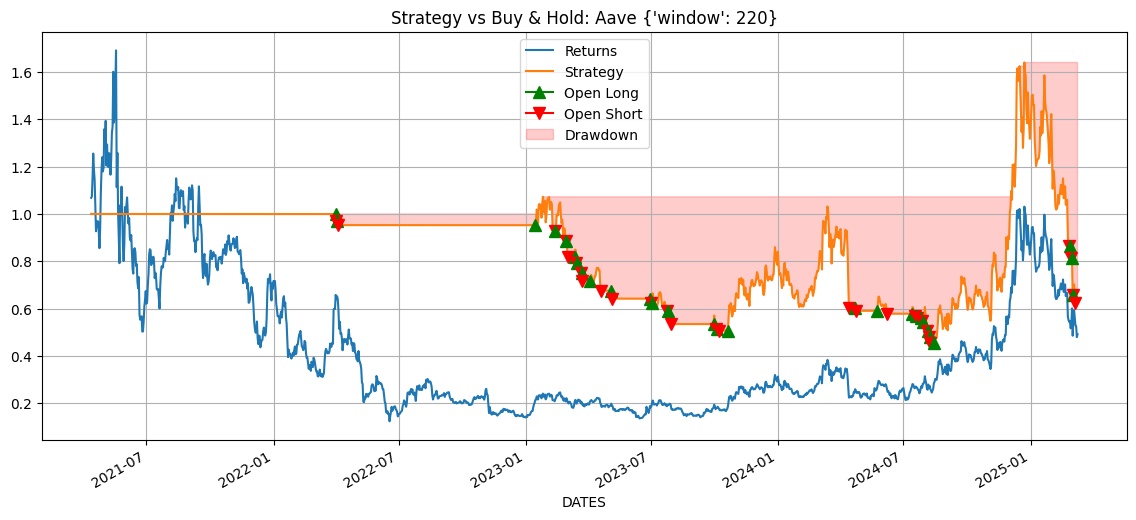

       start        end direction  log_return  net_return_pct  length  \
0 2022-04-01 2022-04-01      Long   -0.000400       -0.039992       1   
1 2022-04-03 2022-04-03      Long   -0.000400       -0.039992       1   
2 2023-01-15 2023-02-11      Long   -0.007918       -0.788655      28   
3 2023-02-13 2023-02-27      Long   -0.004654       -0.464368      15   
4 2023-03-01 2023-03-02      Long   -0.032886       -3.235066       2   
5 2023-03-13 2023-03-14      Long    0.038103        3.883842       2   
6 2023-03-17 2023-03-21      Long    0.006373        0.639373       5   
7 2023-03-23 2023-03-23      Long   -0.000400       -0.039992       1   
8 2023-04-04 2023-04-19      Long   -0.028489       -2.808704      16   
9 2023-05-05 2023-05-05      Long   -0.000400       -0.039992       1   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


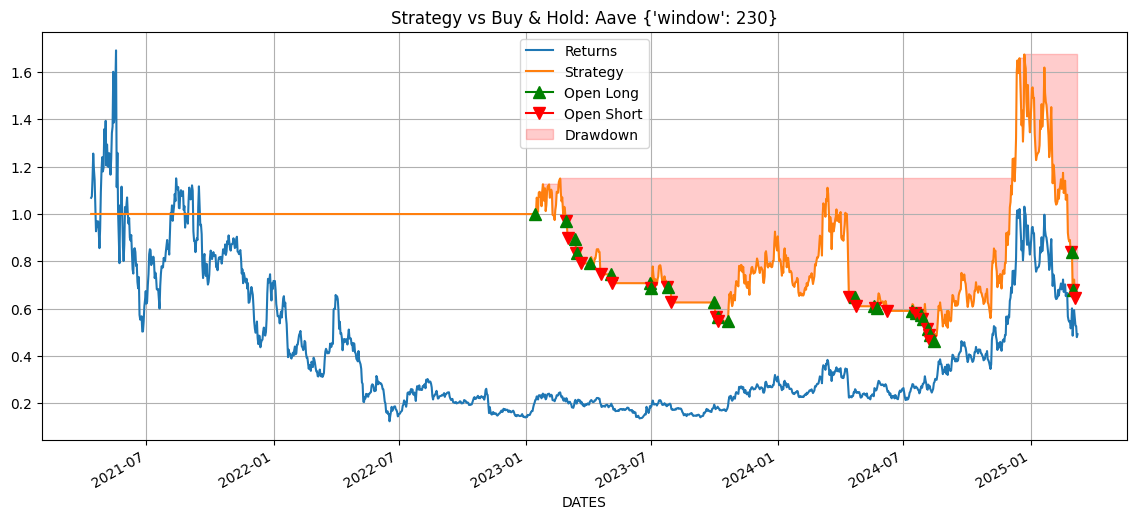

       start        end direction  log_return  net_return_pct  length  \
0 2023-01-15 2023-02-27      Long    0.012800        1.288240      44   
1 2023-03-01 2023-03-02      Long   -0.032886       -3.235066       2   
2 2023-03-14 2023-03-14      Long   -0.000400       -0.039992       1   
3 2023-03-17 2023-03-21      Long    0.006373        0.639373       5   
4 2023-04-04 2023-04-19      Long   -0.028489       -2.808704      16   
5 2023-05-05 2023-05-05      Long   -0.000400       -0.039992       1   
6 2023-06-30 2023-06-30      Long   -0.000400       -0.039992       1   
7 2023-07-02 2023-07-23      Long    0.044465        4.546849      22   
8 2023-07-26 2023-07-30      Long   -0.003181       -0.317620       5   
9 2023-10-01 2023-10-02      Long   -0.043279       -4.235571       2   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


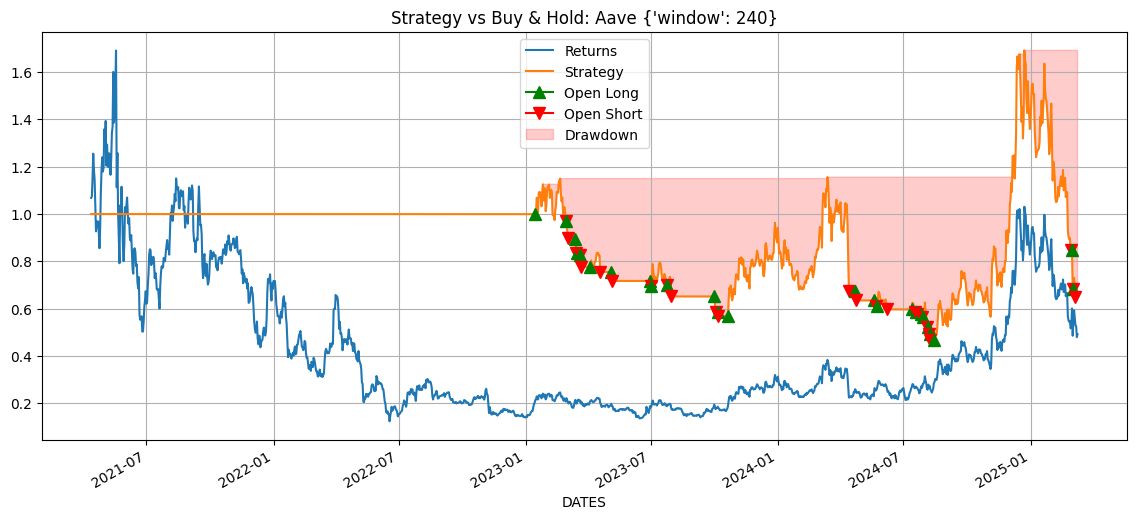

       start        end direction  log_return  net_return_pct  length  \
0 2023-01-15 2023-02-27      Long    0.012800        1.288240      44   
1 2023-03-01 2023-03-02      Long   -0.032886       -3.235066       2   
2 2023-03-14 2023-03-14      Long   -0.000400       -0.039992       1   
3 2023-03-17 2023-03-19      Long    0.019564        1.975712       3   
4 2023-03-21 2023-03-21      Long   -0.000400       -0.039992       1   
5 2023-04-04 2023-04-18      Long    0.059379        6.117691      15   
6 2023-05-05 2023-05-05      Long   -0.000400       -0.039992       1   
7 2023-06-30 2023-06-30      Long   -0.000400       -0.039992       1   
8 2023-07-02 2023-07-23      Long    0.044465        4.546849      22   
9 2023-07-25 2023-07-30      Long    0.023337        2.361169       6   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


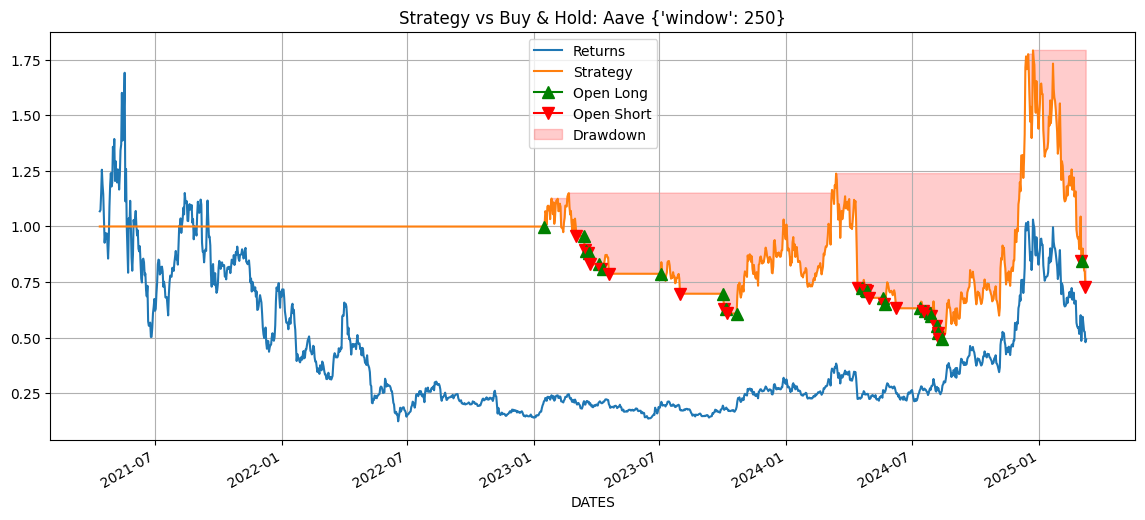

       start        end direction  log_return  net_return_pct  length  \
0 2023-01-15 2023-03-02      Long    0.002325        0.232820      47   
1 2023-03-14 2023-03-14      Long   -0.000400       -0.039992       1   
2 2023-03-17 2023-03-19      Long    0.019564        1.975712       3   
3 2023-03-21 2023-03-21      Long   -0.000400       -0.039992       1   
4 2023-04-05 2023-04-07      Long   -0.004377       -0.436773       3   
5 2023-04-10 2023-04-18      Long    0.060004        6.184063       9   
6 2023-07-03 2023-07-30      Long   -0.027248       -2.688053      28   
7 2023-10-01 2023-10-02      Long   -0.043279       -4.235571       2   
8 2023-10-06 2023-10-06      Long   -0.000400       -0.039992       1   
9 2023-10-21 2024-04-12      Long    0.355965       42.755725     174   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


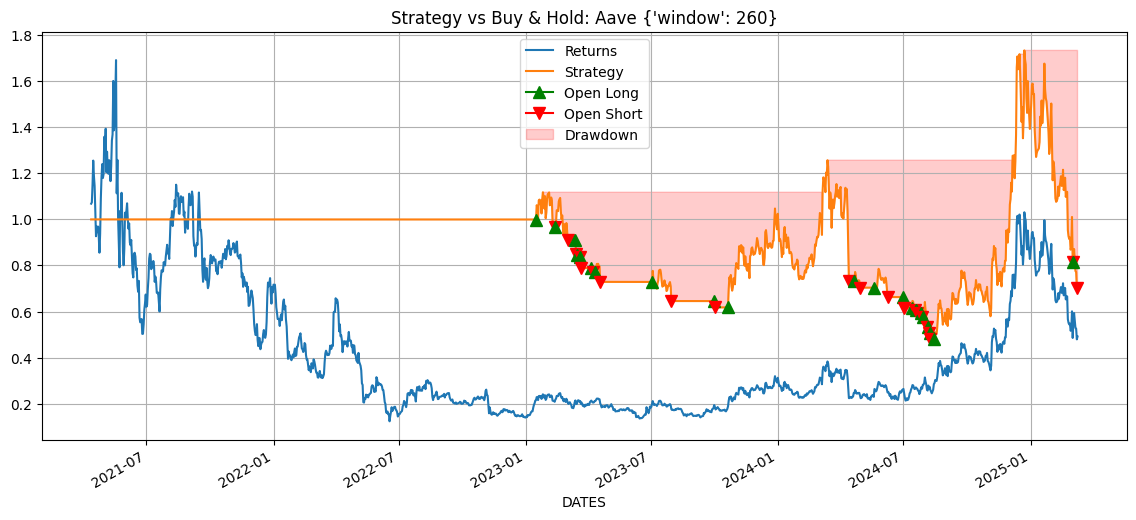

       start        end direction  log_return  net_return_pct  length  \
0 2023-01-16 2023-02-11      Long   -0.014866       -1.475636      27   
1 2023-02-13 2023-03-02      Long   -0.015129       -1.501526      18   
2 2023-03-14 2023-03-14      Long   -0.000400       -0.039992       1   
3 2023-03-17 2023-03-19      Long    0.019564        1.975712       3   
4 2023-03-21 2023-03-21      Long   -0.000400       -0.039992       1   
5 2023-04-05 2023-04-07      Long   -0.004377       -0.436773       3   
6 2023-04-11 2023-04-18      Long    0.033338        3.389959       8   
7 2023-07-03 2023-07-30      Long   -0.027248       -2.688053      28   
8 2023-10-01 2023-10-01      Long   -0.000400       -0.039992       1   
9 2023-10-21 2024-04-12      Long    0.355965       42.755725     174   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


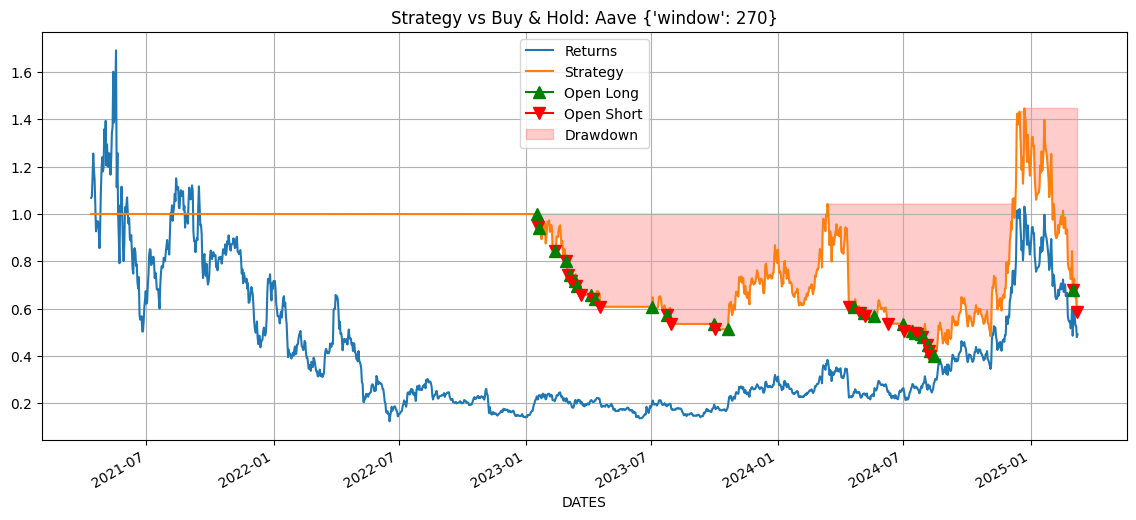

       start        end direction  log_return  net_return_pct  length  \
0 2023-01-17 2023-01-18      Long   -0.008035       -0.800243       2   
1 2023-01-20 2023-02-11      Long   -0.094492       -9.016531      23   
2 2023-02-13 2023-02-27      Long   -0.004654       -0.464368      15   
3 2023-03-01 2023-03-02      Long   -0.032886       -3.235066       2   
4 2023-03-06 2023-03-06      Long   -0.000400       -0.039992       1   
5 2023-03-13 2023-03-14      Long    0.038103        3.883842       2   
6 2023-03-17 2023-03-21      Long    0.006373        0.639373       5   
7 2023-04-05 2023-04-07      Long   -0.004377       -0.436773       3   
8 2023-04-11 2023-04-18      Long    0.033338        3.389959       8   
9 2023-07-03 2023-07-23      Long   -0.016376       -1.624275      21   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


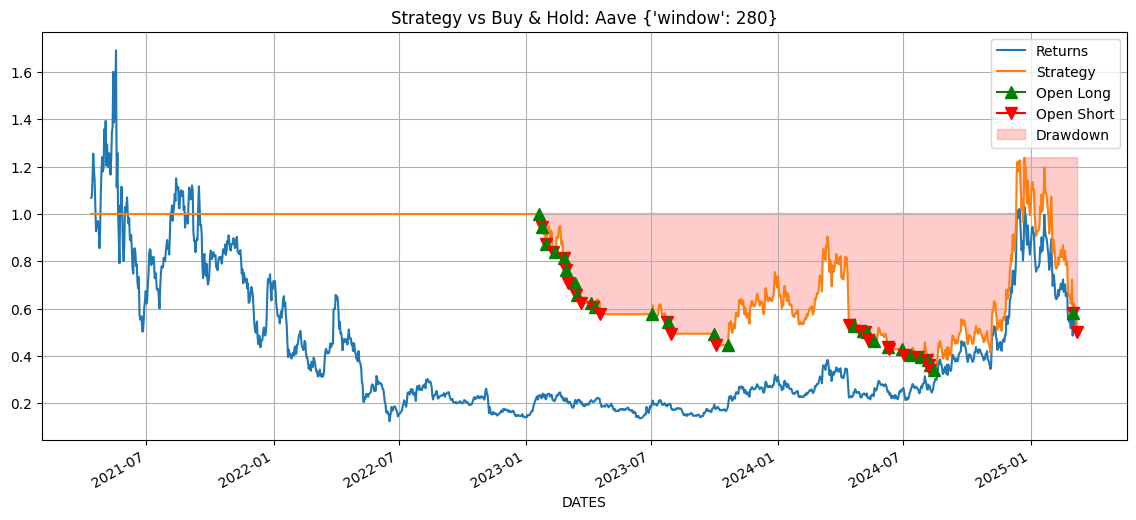

       start        end direction  log_return  net_return_pct  length  \
0 2023-01-20 2023-01-23      Long   -0.001211       -0.121043       4   
1 2023-01-25 2023-01-29      Long    0.011593        1.166038       5   
2 2023-01-31 2023-02-08      Long    0.049510        5.075594       9   
3 2023-02-13 2023-02-24      Long   -0.001822       -0.182068      12   
4 2023-02-26 2023-02-27      Long   -0.017440       -1.728860       2   
5 2023-03-01 2023-03-02      Long   -0.032886       -3.235066       2   
6 2023-03-14 2023-03-14      Long   -0.000400       -0.039992       1   
7 2023-03-17 2023-03-21      Long    0.006373        0.639373       5   
8 2023-04-05 2023-04-07      Long   -0.004377       -0.436773       3   
9 2023-04-11 2023-04-18      Long    0.033338        3.389959       8   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


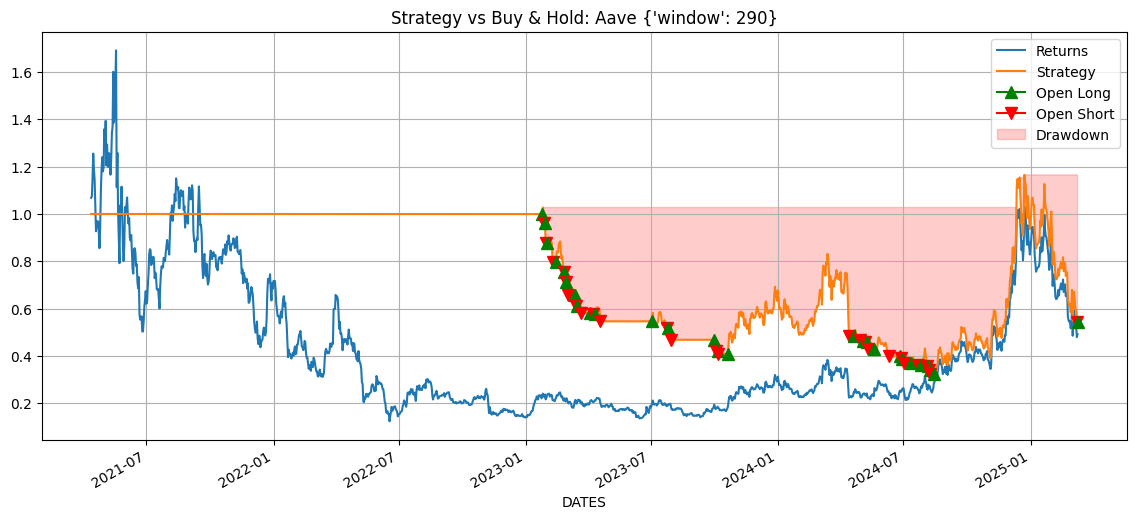

       start        end direction  log_return  net_return_pct  length  \
0 2023-01-25 2023-01-27      Long    0.000806        0.080599       3   
1 2023-01-29 2023-01-29      Long   -0.000400       -0.039992       1   
2 2023-02-01 2023-02-08      Long   -0.005808       -0.579076       8   
3 2023-02-14 2023-02-24      Long   -0.022697       -2.244112      11   
4 2023-02-26 2023-02-27      Long   -0.017440       -1.728860       2   
5 2023-03-01 2023-03-02      Long   -0.032886       -3.235066       2   
6 2023-03-14 2023-03-14      Long   -0.000400       -0.039992       1   
7 2023-03-17 2023-03-21      Long    0.006373        0.639373       5   
8 2023-04-04 2023-04-07      Long    0.014092        1.419212       4   
9 2023-04-11 2023-04-18      Long    0.033338        3.389959       8   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


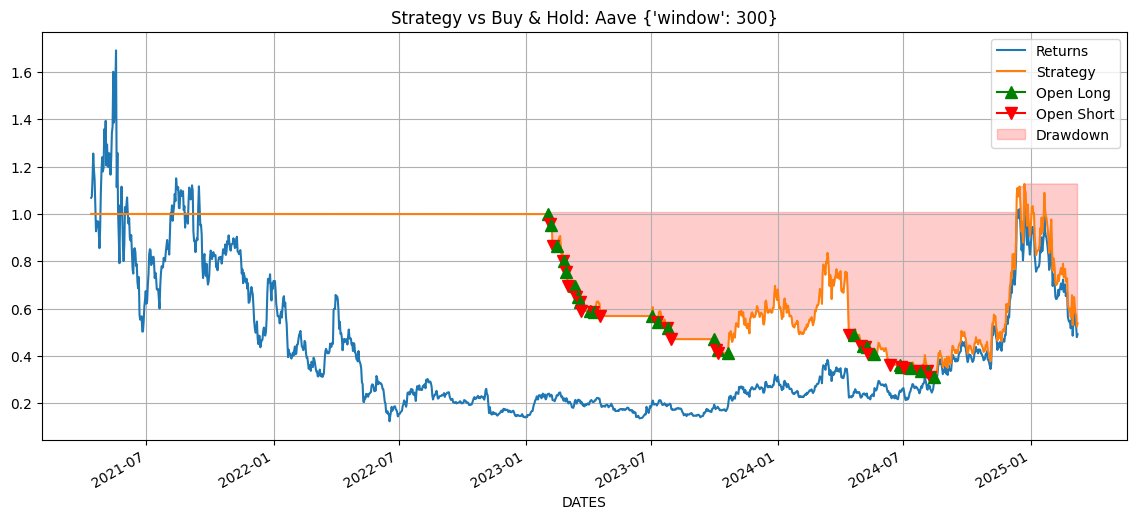

       start        end direction  log_return  net_return_pct  length  \
0 2023-02-02 2023-02-04      Long    0.006216        0.623559       3   
1 2023-02-07 2023-02-08      Long   -0.012173       -1.209905       2   
2 2023-02-15 2023-02-23      Long   -0.022373       -2.212411       9   
3 2023-02-26 2023-02-27      Long   -0.017440       -1.728860       2   
4 2023-03-01 2023-03-02      Long   -0.032886       -3.235066       2   
5 2023-03-14 2023-03-14      Long   -0.000400       -0.039992       1   
6 2023-03-18 2023-03-19      Long   -0.003588       -0.358149       2   
7 2023-03-21 2023-03-21      Long   -0.000400       -0.039992       1   
8 2023-04-04 2023-04-08      Long   -0.005282       -0.526827       5   
9 2023-04-10 2023-04-18      Long    0.060004        6.184063       9   

   total_fees  
0      0.0004  
1      0.0004  
2      0.0004  
3      0.0004  
4      0.0004  
5      0.0004  
6      0.0004  
7      0.0004  
8      0.0004  
9      0.0004  
   asset  window  to

In [ ]:
assets=['Aave']
new_results = []
for asset in assets:
    df = xls[[asset]]
    for params in get_param_combinations(param_grid):
        strategy = strategy_class(df.columns[0],**params)

        bt = Backtester(
            data=df.copy(),
            strategy=strategy,
            initial_cash=initial_cash
        )
        bt.run()
        bt.evaluate(silent=True)
        bt.plot(params=params)
        print(bt.extract_trades(plot_pdf=False).head(10))

        result = {
            "asset": asset,
            **params,
            **bt.get_performance_metrics()
        }

        new_results.append(result)

# Convert results to DataFrame
new_results_df = pd.DataFrame(new_results)
new_results_df.sort_values(by="sharpe", ascending=False, inplace=True)
new_results_df.reset_index(drop=True, inplace=True)
print(new_results_df)